In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
plt.rcParams['figure.figsize'] = (4,3)

In [3]:
data = sns.load_dataset('penguins')

___

# Using stylesheets 

### What are the stylesheets 

In [4]:
import matplotlib as mpl

Global default properties are stored as rcParams: 

In [5]:
print(mpl.rcParams)

_internal.classic_mode: False
agg.path.chunksize: 0
animation.bitrate: -1
animation.codec: h264
animation.convert_args: ['-layers', 'OptimizePlus']
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: black
axes.facecolor: white
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: black
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.8
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
axes.spines.bottom: True
axes.spines.left: True
axes.spines

We can save them locally and use them as a stylesheet 

Default stylesheets: 

In [6]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### Activate predefined stylesheet

Activate style: 

In [26]:
plt.style.use('ggplot')

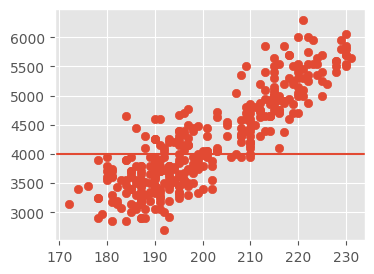

In [8]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']);
ax.axhline(4000)

Recover the defaults: 

In [9]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['figure.dpi'] = 75 # inline import overrides the default dpi  
mpl.rcParams['figure.figsize'] = (4,3) # I set this at the beginning of the notebook to have smaller figures by default

# for some reason we need to re-run this in mpl 3.7.1+
%matplotlib inline 

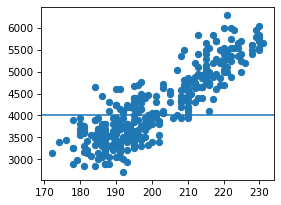

In [10]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']);
ax.axhline(4000)

### Temporarily change the stylesheet

Temporarily change the style: use `plt.style.context(<stylename>)`

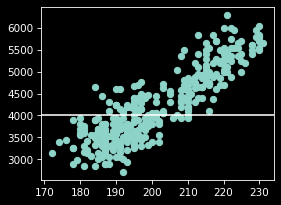

In [11]:
with plt.style.context('dark_background'):
    f, ax = plt.subplots()
    ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']);
    ax.axhline(4000)

In [12]:
print(mpl.rcParams['figure.facecolor'])
with plt.style.context('dark_background'):
    print(mpl.rcParams['figure.facecolor'])

white
black


### Creating custom styles

Define custom default styles: create a text file with keys and values

Look at the reference to see what is available: https://matplotlib.org/stable/tutorials/introductory/customizing.html#the-matplotlibrc-file 

Let's inspect a stylesheet I created: 

In [13]:
with open('./hslu_test_stylesheet.mplstyle', 'r') as f: 
    print(f.read())

axes.titlesize : 24
axes.labelsize : 20
lines.linewidth : 3
lines.markersize : 10
xtick.labelsize : 16
ytick.labelsize : 16
axes.facecolor: antiquewhite
figure.facecolor: wheat


Option 1: `plt.style.context`: will respect some pre-defined rc settings 

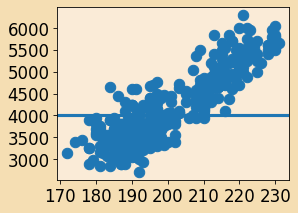

In [14]:
with plt.style.context('./hslu_test_stylesheet.mplstyle'):
    f, ax = plt.subplots()
    ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']);
    ax.axhline(4000)

Option 2: `plt.rc_context`: will overwrite all rc settings

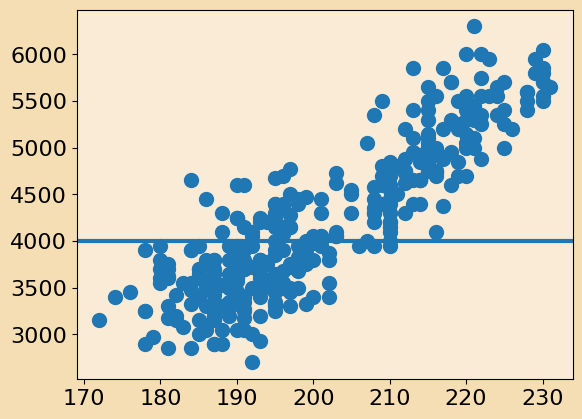

In [15]:
with plt.rc_context(fname='./hslu_test_stylesheet.mplstyle'):
    f, ax = plt.subplots()
    ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']);
    ax.axhline(4000)

___

# Changing the fonts

### Font manager 

Fonts are managed by something called font manager

To inspect which fonts are available: 

In [16]:
import matplotlib.font_manager as fm 

fm.findSystemFonts(fontpaths=None, fontext='ttf')[:5]

['C:\\Windows\\Fonts\\MAIAN.TTF',
 'C:\\Windows\\Fonts\\FRADM.TTF',
 'C:\\Windows\\Fonts\\Candarab.ttf',
 'C:\\Windows\\Fonts\\segoeuii.ttf',
 'C:\\Windows\\Fonts\\VINERITC.TTF']

### Adding fonts 

#### Without installation

If I have downloaded custom fonts, e.g. Fredoka from Google Fonts, I can do: 

In [17]:
font_dir = ['.'] # directory where I stored the freshly downloaded fonts 
for font in fm.findSystemFonts(font_dir):
    print(font)
    fm.fontManager.addfont(font)

c:\Users\David\Desktop\HSLU\sem3\dviz\week04\Silkscreen-Regular.ttf
c:\Users\David\Desktop\HSLU\sem3\dviz\week04\Fredoka-VariableFont_wdth,wght.ttf


In [18]:
fm.fontManager.findfont('Fredoka')

'C:\\Users\\David\\Desktop\\HSLU\\sem3\\dviz\\week04\\Fredoka-VariableFont_wdth,wght.ttf'

#### with installation

If I install a font, sometimes the font cache needs to be rebuilt: 

In [19]:
fm._load_fontmanager(try_read_cache=False)

Most likely the notebook needs to be restarted (this changes between OS and mpl versions)

### Using fonts

#### in rc params

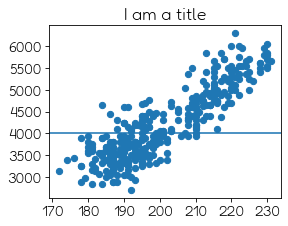

In [20]:
font_rc = {'font.family': 'Fredoka', 'font.size': 14}

with plt.rc_context(rc=font_rc):
    f, ax = plt.subplots()
    ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']);
    ax.axhline(4000)
    ax.set_title('I am a title')

You can also set global `rcParams` with the font name, of course

#### using `FontProperties`

You can also use FontProperties objects with installed fonts or even fonts that are just a ttf file:

Text(0.5, 1.0, 'I am a title')

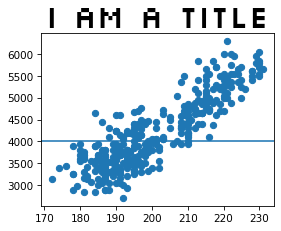

In [21]:
from pathlib import Path

title_font = mpl.font_manager.FontProperties(
            fname=Path("./Silkscreen-Regular.ttf"), size=30)

f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']);
ax.axhline(4000)
ax.set_title('I am a title', fontproperties=title_font)

In [22]:
type(title_font)

matplotlib.font_manager.FontProperties

The API is still a bit inconsistent, but FontProperties can be used across many different mpl objects: 

```
ax.annotate('Something interesting here', 
            xy = (0.5,0.5), xycoords=ax,
            fontproperties=custom_font,)

f.suptitle('Nice title', 
            fontproperties=custom_font, )

for tick in ax.get_yticklabels():
    tick.set_font_properties(custom_font)

ax.legend(handles=handles, prop=custom_font)
```

___

# Bonus: styling Markdown in Jupyter notebooks

You can include <span style="background: red; color: white; font-weight: bold; padding: 1ex">colorful styled span elements</span> in the markdown cells! 

Or print html text with properties relating to your variables: 

In [23]:
species_styles = {
    'Adelie': {'color': 'tomato', 's': 100, 'alpha': 0.5}, 
    'Chinstrap': {'color': 'dodgerblue', 'marker': 'v'}, 
    'Gentoo': {'color': 'darkgray', 'edgecolor':'black'}
}

In [24]:
from IPython.display import display, HTML
display(HTML(f'<h1 style="background: {species_styles["Chinstrap"]["color"]}; color: {species_styles["Adelie"]["color"]};">Hello, styled text!</h1>'))

We will learn more about it once we learn how to use Quarto.